<h1><span style='font-family: "Trebuchet MS", Helvetica, sans-serif;'>Statistical NLP Part-2 - Chatbot
</span></h1>

<h4><ul>
    <li>
        <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DOMAIN:</strong> Customer support</span>
    </li>
</ul></h4>

<h4><ul>
    <li>
        <article><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">CONTEXT:</span></strong></article>
    </li>
</ul>
<article>
    <font face="Trebuchet MS, Helvetica, sans-serif">Great Learning has a an academic support department which receives numerous support requests every day throughout the
year. Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to
heavy workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a
proper resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can
interact with the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request
to an actual human support executive if the request is complex or not in it’s database.</font>
</article> </h4>

<h4><ul>
    <li>
        <article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DATA DESCRIPTION:</strong></span></article>
    </li>
</ul>
<article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics
skills</a></span></article>
    </h4>

<h4>
<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">PROJECT OBJECTIVE:</span></strong></li>
</ul>
<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Design a python based interactive semi - rule based chatbot which can do the following:<br><br>
1. Start chat session with greetings and ask what the user is looking for<br>
2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus<br>
3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it<br></span></p>
    </h4>

In [1]:
# imports

import os
import json
import random
import warnings
from time import time
from math import floor
from pathlib import Path
from random import shuffle
import pandas as pd, numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict
import tensorflow as tf
tqdm.pandas()
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# reproducibility
seed = 7
random.seed(seed)

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Import the corpus.</span></strong></li>
</ul></h3>

In [3]:
with open('./data/GL Bot.json', 'r') as f:
    intents = json.load(f)

In [4]:
pprint(intents, compact=True)

{'intents': [{'context_set': '',
              'patterns': ['hi', 'how are you', 'is anyone there', 'hello',
                           'whats up', 'hey', 'yo', 'listen', 'please help me',
                           'i am learner from', 'i belong to', 'aiml batch',
                           'aifl batch', 'i am from', 'my pm is', 'blended',
                           'online', 'i am from', 'hey ya',
                           'talking to you for first time'],
              'responses': ['Hello! how can i help you ?'],
              'tag': 'Intro'},
             {'context_set': '',
              'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later',
                           'see you later', 'goodbye', 'i am leaving',
                           'have a Good day', 'you helped me', 'thanks a lot',
                           'thanks a ton', 'you are the best', 'great help',
                           'too good', 'you are a good learning buddy'],
              'responses': ['I hope

Some terminology for the corpus:

* Pairs: Collection of all transactions [Input and Output] to be used for training the chatbot.
* Read/patterns: Patterns which are or could be expected as inputs from end-users.
* Response: Patterns which are or could be delivered as outputs from the chatbot to end-users.
* Regular Expressions: Patterns which can be used to generalise patterns for read and response. This is mainly used to optimise the corpus by making it more generic and avoid generating static read and write responses. 
* Tag: To group similar text instances and use the same as targeted outputs to train neural networks.

In [5]:
# enhanced intents corpus
with open('./data/Enhanced_GL_Bot_intents.json', 'r') as f:
    intents = json.load(f)['intents']

In [6]:
pprint(intents, compact=True)

[{'context_set': '',
  'patterns': ['good day', 'hello', 'hey', 'hey i have a doubt', 'hi',
               'i need some help', 'is anyone there', 'is anyone there?',
               'whats up', "a'ight", 'afternoon, boss.',
               'ahoy matey how are you', 'ahoy matey how are you?',
               'aifl batch', 'aiml batch', 'aiml batch 10', 'aiml batch 11',
               'aiml batch 8', 'aiml batch 9', 'aloha.', 'anyone there?',
               'appreciate it', 'are you alright', 'are you having a good day',
               'are you ok?', 'are you okay', 'asante', 'blended', 'bonjour!',
               'brother', 'cheers', 'dear friend', 'do you feel good',
               'do you have a great day', 'evening', 'fist bump', "g'day",
               'good afternoon', 'good afternoon.', 'good day', 'good day.',
               'good evening', 'good morning', 'greetings',
               'greetings, earthling', 'heeyyyyyyyyyy', 'hello', 'hello.',
               'hey', 'hey buddy', 'hey m

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Data Preprocessing</span></strong></li>
</ul></h3>

In [7]:
intents[0].keys()

dict_keys(['context_set', 'patterns', 'responses', 'tag'])

In [8]:
# create dataset
intents_df = pd.DataFrame()

for intent in intents:
    print(intent['tag'])
    patterns = intent['patterns']
    response = intent['responses'][0]
    intent_df = pd.DataFrame({'pattern': patterns,
                              'reponse':[response]*(len(patterns)),
                              'intent': [intent['tag']]*(len(patterns))})
    intents_df = pd.concat([intents_df, intent_df])
    

Intro
Exit
Olympus
SL
NN
Bot
Profane
Ticket


In [9]:
intents_df.sample(25)

,pattern,reponse,intent
114,unsupervised ml,Link: Machine Learning wiki,SL
132,thanks,Hello there! How can i help?,Intro
54,see you around,"I hope I was able to assist you, Good Bye",Exit
112,clustering,Link: Machine Learning wiki,SL
6,shit,Kindly use respectful words,Profane
4,i hate you,Kindly use respectful words,Profane
26,understand ensemble techb=niques,Link: Machine Learning wiki,SL
35,stochastic gradient descent,Link: Neural Nets wiki,NN
115,unsupervised learning,Link: Machine Learning wiki,SL
1,all i can say is thanks!,"I hope I was able to assist you, Good Bye",Exit


In [10]:
# !pip install spacy
# !python -m spacy downlaod en_core_web_sm

import spacy
import nltk

nltk.download('punkt')
nltk.download('stopwords')
# Initialize spacy 'en_core_web_sm' model
nlp = spacy.load('en_core_web_sm', disable=['parser'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
# utility functions for text preprocesing
import re
import string
import unicodedata
import contractions
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
stop_words = set(nltk.corpus.stopwords.words('english'))

def replace_accented_chars(review_text):
    '''normalizes and replaces accented characters'''
    unaccented_text = unicodedata.normalize('NFKD', review_text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return unaccented_text



def strip_html_tags(review_text):
    '''strips html tags like <h4> ..etc'''
    soup = BeautifulSoup(review_text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text


def expand_contractions(review_text):
    review_text = contractions.fix(review_text)
    return review_text


def remove_special_characters(review_text):
    '''
    Remove special characters but preserve digits and excalamation marks
    as they indicate emotionally charged review '''
    review_text = re.sub(r"[^A-Za-z0-9!?\'\`]", " ", review_text)
    return review_text


def strip_stops(text, is_lower_case=False, stop_words=stop_words):
    '''strip stopwrds'''
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop_words]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def tokenize(text):
    '''tokenize using spaCy'''
    doc = nlp(text)
    return " ".join([t.text for t in doc])

# Stemming/Lemmatization
def lemmatize(text):
    '''lemmatize using spaCy'''
    doc = nlp(text)
    return " ".join([t.lemma_ for t in doc])


def snowball_stem(text, stemmer=stemmer):
    '''stemming using snowball stemmer'''
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    review_text = " ".join(stemmed_words)
    return review_text

In [12]:
def preprocess_text(text: str, lower=True,
                    strip_stops=False) -> str:
    text = replace_accented_chars(text)
    text = strip_html_tags(text)
    text = expand_contractions(text)
    text = remove_special_characters(text)
    if lower:
        text = text.lower()
    if strip_stops:
        text = strip_stops(text)
    text = tokenize(text)
    text = lemmatize(text)
    return str(text.strip())


sentence = "<p>How are you doing? 😊</p>"
cleaned = preprocess_text(sentence)
cleaned

'how be you do ?'

In [13]:
def preprocess(row):
    text = row.pattern
    if isinstance(text, str):
        text = preprocess_text(text)
    else:
        text = np.nan
    row['cleaned_pattern'] = text
    return row

In [14]:
intents_df = intents_df.progress_apply(preprocess, axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 574/574 [00:03<00:00, 159.00it/s]


In [15]:
intents_df.isna().any()

pattern            False
reponse            False
intent             False
cleaned_pattern    False
dtype: bool

In [16]:
# encode the target column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
intents_df['labels' ] = le.fit_transform(intents_df['intent'])

In [17]:
intents_df.sample(25)

,pattern,reponse,intent,cleaned_pattern,labels
47,machine learning algorithm,Link: Machine Learning wiki,SL,machine learn algorithm,6
0,my problem is not solved,Tarnsferring the request to your PM,Ticket,my problem be not solve,7
144,whats up,Hello there! How can i help?,Intro,what be up,2
31,appreciate it,"I hope I was able to assist you, Good Bye",Exit,appreciate it,1
104,boosting,Link: Machine Learning wiki,SL,boost,6
63,how are things going,Hello there! How can i help?,Intro,how be thing go,2
74,supervised learning algorithms wiki,Link: Machine Learning wiki,SL,supervise learn algorithms wiki,6
2,all i can say is thanks,"I hope I was able to assist you, Good Bye",Exit,all I can say be thank,1
11,are you a bot or person,I am your virtual learning assistant,Bot,be you a bot or person,0
46,how to test nn,Link: Neural Nets wiki,NN,how to test nn,3


In [18]:
vocab = []
for text in intents_df.cleaned_pattern.tolist():
    vocab.extend(tokenize(text).split())
print(len(vocab))

1817


In [19]:
num_classes = len(le.classes_)

In [20]:
le.classes_

array(['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket'],
      dtype=object)

In [21]:
intent_to_idx = {i: j for i, j in zip(le.classes_, range(num_classes))}
idx_to_intent = {v: i for i, v in intent_to_idx.items()} # inverse lookup
intent_to_idx

{'Bot': 0,
 'Exit': 1,
 'Intro': 2,
 'NN': 3,
 'Olympus': 4,
 'Profane': 5,
 'SL': 6,
 'Ticket': 7}

In [22]:
idx_to_intent

{0: 'Bot',
 1: 'Exit',
 2: 'Intro',
 3: 'NN',
 4: 'Olympus',
 5: 'Profane',
 6: 'SL',
 7: 'Ticket'}

In [23]:
dataset = []
for text, intent in zip(intents_df.cleaned_pattern, intents_df.intent):
    bow = []
    text_tokens = text.split()
    for w in vocab:
        if w in text_tokens:
            bow.append(1)
        else:
            bow.append(0)

    one_hot = list([0]*(num_classes))
    one_hot[intent_to_idx[intent]] = 1  # one hot (1) at the specified index

    dataset.append([bow, one_hot])

In [24]:
SHUFFLE = True
if SHUFFLE:
    # shuffle our features and turn into np.array
    shuffle(dataset)

dataset = np.array(dataset)
dataset.shape

(574, 2)

In [25]:
X_train = dataset[:,0]
y_train = dataset[:,1]
X_train.shape, y_train.shape

((574,), (574,))

In [26]:
# pprint(X_train[0], compact=True)
y_train[0]

[0, 0, 0, 0, 0, 0, 0, 1]

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Design a neural network to classify the queries with INTENTS as target outputs</span></strong></li>
</ul></h3>


In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.callbacks import LambdaCallback, EarlyStopping
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import text
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import SGD

In [28]:
simple_log = LambdaCallback(
    on_epoch_end = lambda e, l: print(f" ~| Epoch: {e+1} | Validation Loss: {l['val_loss']:.5f}", end =" >|> \n" ))

early_stop = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=1,
                              verbose=0, 
                              restore_best_weights=True)
sns.set()
def plot_learning_curve(hist):
    plt.figure(figsize=(5,5))
    train = hist.history['loss']
    val = hist.history['val_loss']
    epochs_run = range(1,len(train) + 1)
    sns.lineplot(epochs_run, train, marker = 'o', color = 'coral', label = 'Training Loss')
    sns.lineplot(epochs_run, val,  marker = '>', color = 'green', label = 'Validation Loss')
    plt.title("Loss vs. Epochs", fontsize = 20)
    plt.legend()
    plt.show()

In [29]:
model = Sequential([    
    Dense(128, input_shape=(len(X_train[0]), ), activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               232704    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 241,480
Trainable params: 241,480
Non-trainable params: 0
_________________________________________________________________


In [30]:
X_train = np.array([np.array(i) for i in X_train])
y_train = np.array([np.array(i) for i in y_train])

In [31]:
epochs = 100

h = model.fit(
    X_train, y_train,
    validation_split = 0.2,
    epochs = epochs,
    callbacks = [simple_log],
    verbose = False)

print("\nDone.")

 ~| Epoch: 1 | Validation Loss: 1.80175 >|> 
 ~| Epoch: 2 | Validation Loss: 1.60664 >|> 
 ~| Epoch: 3 | Validation Loss: 1.44113 >|> 
 ~| Epoch: 4 | Validation Loss: 1.33685 >|> 
 ~| Epoch: 5 | Validation Loss: 1.22956 >|> 
 ~| Epoch: 6 | Validation Loss: 1.16458 >|> 
 ~| Epoch: 7 | Validation Loss: 1.10524 >|> 
 ~| Epoch: 8 | Validation Loss: 1.02818 >|> 
 ~| Epoch: 9 | Validation Loss: 1.00700 >|> 
 ~| Epoch: 10 | Validation Loss: 0.97976 >|> 
 ~| Epoch: 11 | Validation Loss: 0.91114 >|> 
 ~| Epoch: 12 | Validation Loss: 0.86507 >|> 
 ~| Epoch: 13 | Validation Loss: 0.80688 >|> 
 ~| Epoch: 14 | Validation Loss: 0.79017 >|> 
 ~| Epoch: 15 | Validation Loss: 0.77656 >|> 
 ~| Epoch: 16 | Validation Loss: 0.75201 >|> 
 ~| Epoch: 17 | Validation Loss: 0.75824 >|> 
 ~| Epoch: 18 | Validation Loss: 0.73035 >|> 
 ~| Epoch: 19 | Validation Loss: 0.70634 >|> 
 ~| Epoch: 20 | Validation Loss: 0.69931 >|> 
 ~| Epoch: 21 | Validation Loss: 0.66998 >|> 
 ~| Epoch: 22 | Validation Loss: 0.64194 >|

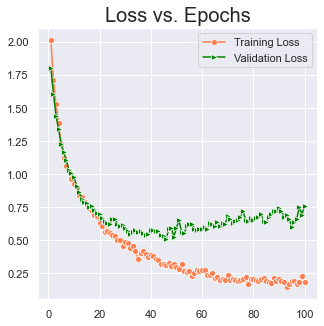

In [32]:
plot_learning_curve(h)

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Design a chat utility as a function to interact with the user till the user calls a “quit”</span></strong></li>
</ul></h3>

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">If the user does not understand or finds the bot’s answer irrelevant, the user calls a “*” asking the bot to re-evaluate what the user has asked</span></strong></li>
</ul></h4>


In [33]:
from collections import defaultdict

class IntentClassifier():

    def __init__(self, intents, vocab, idx_to_intent, model):
        self.intents = intents
        self.vocab = vocab
        self.model = model
        self.idx_to_intent = idx_to_intent

        responses = defaultdict()
        for intent in intents:
            responses[intent['tag']] = intent['responses']
        self.responses = dict(responses)

        intents_lookup = defaultdict()
        for intent in intents:
            tag = intent['tag']
            for text in intent['patterns']:
                intents_lookup[text] = tag
        self.intents_lookup = dict(intents_lookup)

    def search_intent(self, text):
        return self.intents_lookup.get(text.lower().strip(), 'na')
    
    def get_bow(self, text):
        text = preprocess_text(text)
        text_tokens = text.split()
        # bag of words - matrix of N words, vocabulary matrix
        bag = np.array([0]*len(self.vocab))
        for tok in text_tokens:
            for idx, word in enumerate(self.vocab):
                if word == tok: 
                    # assign 1 if current word is in the vocabulary position
                    bag[idx] = 1
        return(np.array(bag))

    def predict_intent(self, text):
        # filter out predictions below a threshold
        bow = self.get_bow(text)
        pred = self.model.predict(np.array([bow]))[0]
        results = [[intent, prob] for intent, prob in enumerate(pred) if prob>0.25]
        # sort by strength of probability
        results.sort(key=lambda x: x[1], reverse=True)
        return_list = []
        for r in results:
            return_list.append({"intent": self.idx_to_intent[r[0]], "probability": str(r[1])})
        return return_list

    def classify(self, text):
        intent = self.search_intent(text)
        if intent != 'na':
            return intent
        intents = self.predict_intent(text)
        if len(intents):
            return intents[0]['intent']

    def generate_response(self, text):
        intent = self.classify(text)
        default_msg = "I am sorry! I don't understand you. Can you rephrase your query?"
        response  = self.responses.get(intent, default_msg)
        return response

In [34]:
ic = IntentClassifier(intents, vocab, idx_to_intent, model)
ic

In [35]:
ic.classify('Hey there!')

'Intro'

In [36]:
ic.generate_response('Hey there!')

['Hello there! How can i help?']

In [37]:
ic.classify('please explain Deep Learning')  # out of sample text

'NN'

In [38]:
ic.generate_response('please explain Deep Learning')  # out of sample text

['Link: Neural Nets wiki']

In [39]:
# Chatbot Utility
def chat(ic):
    print("Hi there! I am Groot! (type your query or 'quit' to exit the chat)")
    print("If the response to the query doesn't make sense, type '*'")
    default_msg = "I am sorry! I don't understand you. Can you rephrase your query?"
    
    prev_query = 'na'
    user = input("Hi! WHat's your name?")
    errors = 0
    # chat loop
    while True:
        query = str(input())
        print(f'{user}: {query}')
        prev_query = query
        if query.lower().strip() == 'quit':
            break
        if query.lower().strip() == '*':
            errors += 1
            query = prev_query
        if errors == 2:
            print(f'Groot: {default_msg}')
            errors = 0
            continue
        if not isinstance(query, str):
            print(f'Groot: {default_msg}')
            continue
        response = ic.generate_response(query)
        print(f'Groot: {response[0]}')
        print()

In [40]:
chat(ic)

Hi there! I am Groot! (type your query or 'quit' to exit the chat)
If the response to the query doesn't make sense, type '*'


Hi! WHat's your name? Pradeep
 Anyone there?


Pradeep: Anyone there?
Groot: Hello there! How can i help?



 Who are you


Pradeep: Who are you
Groot: I am your virtual learning assistant



 I have a problem with my olympus dashboard


Pradeep: I have a problem with my olympus dashboard
Groot: Link: Olympus wiki



 Can you connect me to a human


Pradeep: Can you connect me to a human
Groot: Tarnsferring the request to your PM



 Can you explain Machine Learning? 🤔


Pradeep: Can you explain Machine Learning? 🤔
Groot: I hope I was able to assist you, Good Bye



 *


Pradeep: *
Groot: Link: Neural Nets wiki



 *


Pradeep: *
Groot: I am sorry! I don't understand you. Can you rephrase your query?


 explain ML 😠


Pradeep: explain ML 😠
Groot: Link: Machine Learning wiki 



 Can you explain Naive Bayes Classifier?


Pradeep: Can you explain Naive Bayes Classifier?
Groot: I hope I was able to assist you, Good Bye



 *


Pradeep: *
Groot: Link: Neural Nets wiki



 *


Pradeep: *
Groot: I am sorry! I don't understand you. Can you rephrase your query?


 explain naive bayes classifier


Pradeep: explain naive bayes classifier
Groot: Link: Machine Learning wiki 



 explain deep learning architecture


Pradeep: explain deep learning architecture
Groot: Link: Neural Nets wiki



 ok thank you very much groot


Pradeep: ok thank you very much groot
Groot: I hope I was able to assist you, Good Bye



 quit


Pradeep: quit


<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">This chatbot can be improved by further training as our intent classifier was trained on a very limited dataset although it was extended, we can train it using a dataset of converstations between users and customer support execs. For e.g, https://www.kaggle.com/thoughtvector/customer-support-on-twitter/data can beused for training a chatbot. This dataset was created by collecting publicly available conversations between customer supports and users on Twitte</span></strong></li>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">We can also use a better profanity filter by using packages like profanity-filter or building a ML/DL model to detect it ourselves so that the responses are filterd out properly</span></strong></li>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">We can also add an NER model to understand the language more and train better models to make our chatbot smarter.</span></strong></li>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Also, we could use pre-built frameworks like dialogflow, rasa ...etc., to utilize the language models that are in-built instead of doing it from scratch and customize the chatbot as per the requirements of the clients/users.</span></strong></li>
</ul></h3>